# High Resolution Electricity Access (HREA)

HREA is a dataset created by [U. Michigan](http://www-personal.umich.edu/~brianmin/HREA/index.html) that provides Settlement-level measures of electricity access, reliability, and usage
derived from the complete archive of nightly VIIRS satellite imagery. 

The [HREA](http://www-personal.umich.edu/~brianmin/HREA/index.html) project aims to provide open access to new indicators of electricity access and reliability across the world. Leveraging satellite imagery with computational methods, these high resolution data provide new tools to track progress towards reliable and sustainable energy access across the world.

This sample notebook shows a sample of how to read and work with the data in Python

## Reading the whole file

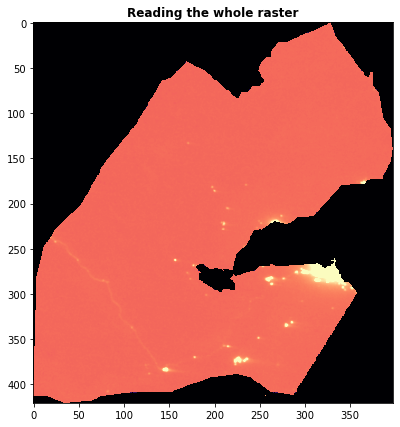

In [7]:
%matplotlib inline
import rasterio
from rasterio.plot import show
from matplotlib import pyplot
import matplotlib.colors as colors

url=f'https://hreadatasa.blob.core.windows.net/hrea/HREA/HREA_Djibouti_2019_v1/Djibouti_rade9lnmu_2019.tif'

#Read Whole raster
with rasterio.open(url) as src:
    raster = src.read()
fig, xraster = pyplot.subplots(1, 1, figsize=(14,7))
show(raster, ax=xraster,norm=colors.PowerNorm(1,vmin=.01,vmax=1.4), cmap='magma', title="Reading the whole raster");
pyplot.show()

## Reading a subwindow

Cloud Optimized Geotiffs have an internal structure that allows to download and read partial sections of the file. Inside the file, the data is split into "windows". A very fast way to paralelize your code is to read those windows directly

(1, 165, 256)


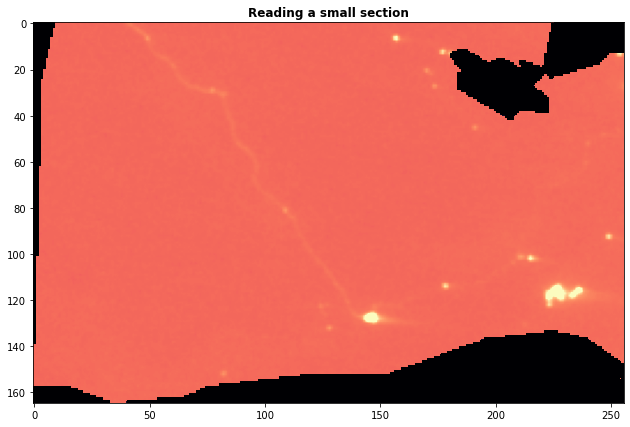

In [8]:
#Reading only the 2nd window of the file, as an example
with rasterio.Env():
    with rasterio.open(url) as src:
        ij, window = list(src.block_windows())[2]
        section = src.read(window=window)
print(section.shape)
fig, xsection = pyplot.subplots(1, 1, figsize=(14,7))        
show(section, ax=xsection,norm=colors.PowerNorm(1,vmin=.01,vmax=1.4), cmap='magma', title="Reading a small section");
pyplot.show()

Let's focus on the City of Dikhil situaded around:

x,y=[120:135,140:155]


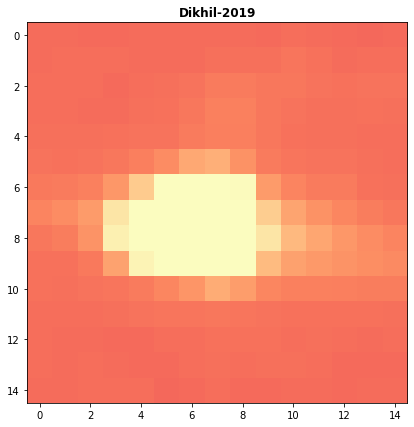

In [9]:
fig, xsection = pyplot.subplots(1, 1, figsize=(14,7))        
show(section[:,120:135,140:155], ax=xsection,norm=colors.PowerNorm(1,vmin=.01,vmax=1.4), cmap='magma', title="Dikhil-2019");
pyplot.show()

Now we can read all years, and plot the change over years

In [10]:
import numpy as np
sections =  []
for year in np.arange(2012,2020):
    print(f'reading year {year}',end='\r')
    with rasterio.Env():
        url=f'https://hreadatasa.blob.core.windows.net/hrea/HREA/HREA_Djibouti_{year}_v1/Djibouti_rade9lnmu_{year}.tif'
        with rasterio.open(url) as src:
            ij, window = list(src.block_windows())[2]
            sections.append(src.read(window=window))
sections=np.squeeze(sections, axis=None)
sections.shape

(8, 165, 256)

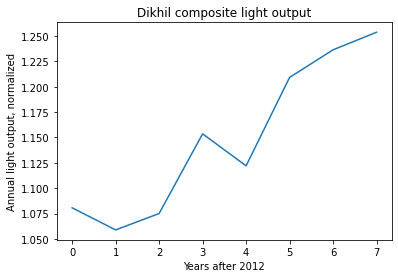

In [11]:
import matplotlib.pyplot as plt
Dikhil=sections[:,120:135,140:155]
dims=Dikhil.shape
Dikhil=np.reshape(Dikhil, (dims[0],dims[1]*dims[2]))

plt.plot(np.percentile(Dikhil,90,axis=1))
plt.title("Dikhil composite light output")
plt.ylabel("Annual light output, normalized");
plt.xlabel("Years after 2012");